<a href="https://colab.research.google.com/github/jmlopezfabian/Competitive-Programming/blob/main/DeteccionEmociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de emociones en expresiones faciales de estudiantes

El presente proyecto utiliza métodos de visión por computadora, junto con clasificación de imágenes; de esta forma podrá detectar y categorizar las emociones mostradas en las expresiones faciales de los estudiantes dentro del entorno académico.

Una vez que se haya desarrollado el modelo, va a ser posible utilizar los datos obtenidos para proporcionar retroalimentación a los docentes sobre el nivel emocional de los alumnos durante los periodos de clases; por ejemplo: si se detecta que la mayor parte de los estudiantes muestran gestos de aburrimiento,  entonces el docente puede cambiar la dinámica de enseñanza para recuperar la atención de estos.

28000 imagenes en train

In [47]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Mostrando algunas imagenes del DataSet

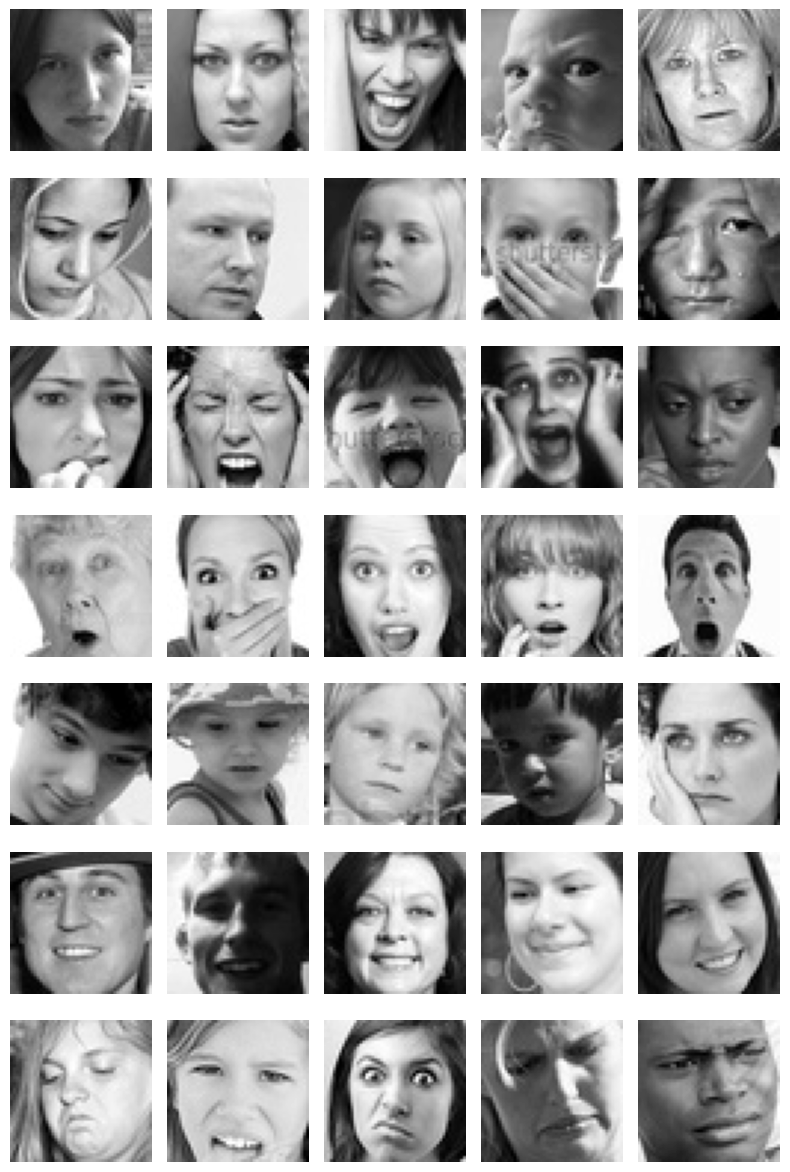

In [46]:
input_path = "/content/drive/MyDrive/Data/archive/train"

fig, axes = plt.subplots(7, 5, figsize=(8, 12))  # Crear una figura y subtrazados de tamaño 7x3

image_index = 0  # Variable para rastrear el índice de la imagen

for file_name in os.listdir(input_path):
    etiqueta = file_name
    current_folder = os.path.join(input_path, file_name)
    for i in range(5):
        imagen = os.listdir(current_folder)[i]
        imagen_path = os.path.join(current_folder, imagen)
        imagen = Image.open(imagen_path).convert("L")  # Convertir a escala de grises
        row = (image_index // 5) % 7  # Fila actual
        col = image_index % 5  # Columna actual
        axes[row, col].imshow(imagen, cmap="gray")  # Mostrar la imagen en el subtrazado correspondiente
        axes[row, col].set_xlabel(etiqueta)
        axes[row, col].axis("off")  # Desactivar los ejes
        image_index += 1  # Incrementar el índice de la imagen

plt.tight_layout()  # Ajustar el diseño de las subfiguras
plt.show()


In [ ]:
img = Image.open('/content/drive/MyDrive/Data/archive/test/angry/PrivateTest_10131363.jpg')
img_array = np.asarray(img)
print(img_array)

[[ 46  34  26 ...  10  13  22]
 [ 50  28  21 ...  11  10  21]
 [ 50  27  15 ...  22  24  22]
 ...
 [208 179 108 ... 191 205 204]
 [212 198 149 ... 181 200 204]
 [208 201 171 ... 165 180 189]]


Antes de entrenar nuestro clasificador de imágenes, es crucial normalizar las imágenes de entrenamiento para garantizar un buen rendimiento del modelo. Cuando los datos de entrada a una red neuronal no están normalizados, puede haber una amplia variabilidad en los rangos de los valores de entrada, lo que puede provocar que algunos pesos de las capas de la red se actualicen más rápidamente que otros, lo que puede llevar a una mala convergencia. La normalización de las imágenes ayuda a reducir esta variabilidad y a mantener la estabilidad numérica en la red.

Además, la normalización puede ayudar a mejorar la capacidad de generalización del modelo al reducir la dependencia de la red neuronal en los valores específicos de las características de entrada. Esto permite que el modelo se centre más en patrones y características relevantes para la tarea de clasificación o predicción, lo que conduce a una mejor capacidad de generalización en el modelo.

En resumen, la normalización de las imágenes es un paso crítico en el proceso de entrenamiento de una red neuronal. Ayuda a reducir la variabilidad en los datos de entrada, mejora la estabilidad numérica en la red y permite una mejor generalización del modelo, lo que conduce a un mejor rendimiento del modelo en tareas de clasificación o predicción de imágenes.

## Normalización por mínimo-máximo
La normalización por mínimo-máximo es una técnica comúnmente utilizada en el procesamiento de imágenes para mejorar la calidad de los datos antes de ser utilizados en un modelo de aprendizaje profundo. En particular, es una técnica crucial en el preprocesamiento de imágenes antes de entrenar una red neuronal.

La normalización por mínimo-máximo es una técnica utilizada para ajustar el rango de valores de intensidad de una imagen a un rango deseado, típicamente entre 0 y 255.

La ecuación para aplicar la normalización por mínimo-máximo a una imagen $f(x,y)$ de tamaño $M \times N$ es la siguiente:

$$g(x,y) = \frac{(f(x,y) - \min(f)) \times (new\_max - new\_min)}{\max(f) - \min(f)} + new\_min$$

donde $\min(f)$ y $\max(f)$ son los valores mínimo y máximo de intensidad en la imagen $f$, respectivamente, y $new\_min$ y $new\_max$ son los valores mínimo y máximo de intensidad que se desean en la imagen normalizada $g$.


[[ 48.51769912  34.97787611  25.95132743 ...   7.89823009  11.28318584
   21.4380531 ]
 [ 53.03097345  28.2079646   20.30973451 ...   9.02654867   7.89823009
   20.30973451]
 [ 53.03097345  27.07964602  13.53982301 ...  21.4380531   23.69469027
   21.4380531 ]
 ...
 [231.30530973 198.5840708  118.47345133 ... 212.12389381 227.92035398
  226.7920354 ]
 [235.81858407 220.02212389 164.73451327 ... 200.84070796 222.27876106
  226.7920354 ]
 [231.30530973 223.40707965 189.55752212 ... 182.78761062 199.71238938
  209.86725664]]


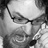

(48, 48)

In [ ]:
from tensorflow.python.ops.linalg_ops import norm
img = Image.open('/content/drive/MyDrive/Data/archive/test/angry/PrivateTest_10131363.jpg')

# Convierte la imagen a un arreglo NumPy
img_array = np.asarray(img)

# Calcula los valores mínimo y máximo de intensidad en la imagen
min_val = np.min(img_array)
max_val = np.max(img_array)

# Normaliza la imagen
normalized_img = (img_array - min_val) * (255.0 / (max_val - min_val))
print(normalized_img)
# Convierte el arreglo de vuelta a una imagen
normalized_img = Image.fromarray(normalized_img.astype(np.uint8))

# Muestra la imagen normalizada
normalized_img.show()
normalized_img.size

#Funcion que normaliza una imagen por el método de minimo-maximo

In [ ]:
def normalize_image(image_path, new_min = 0.0, new_max = 255.0):
  img = Image.open(image_path)
  img_array = np.array(img)
  min_val = np.min(img_array)
  max_val = np.max(img_array)
  normalized_array = (((img_array - min_val) * (new_max - new_min)) / (max_val - min_val) ) + new_min
  normalized_image = Image.fromarray(normalized_array.astype('uint8'))
  return normalized_image


#Normalizacion de todas las imagenes

In [ ]:

#Directorios de Entrada y salida

def normalize_folder(input_folder, output_folder):
  if not os.path.exists(output_folder): #Creamos el folder en caso de que no exista
    os.makedirs(output_folder)
  for file_name in os.listdir(input_folder):
    if file_name.endswith('.jpg'):
      input_path = os.path.join(input_folder, file_name)
      output_path = os.path.join(output_folder, file_name)
      new_img = normalize_image(input_path)
      new_img.save(output_path)

In [ ]:
#Directorios de Entrada y salida
input_path = "/content/drive/MyDrive/Data/archive/train/"
output_path = "/content/drive/MyDrive/Data/archive/NormalizedData/"

#normalize_folder(input_path,output_path)

for file_name in os.listdir(input_path):
  input_folder = os.path.join(input_path,file_name)
  output_folder = os.path.join(output_path,file_name)
  normalize_folder(input_folder, output_folder)

# Proceso HOG

El proceso de HOG (Histogram of Oriented Gradients) implica la creación de un histograma de las orientaciones de gradiente locales de una imagen. Esto se hace dividiendo la imagen en celdas más pequeñas y calculando los gradientes en cada píxel de la celda. Luego, se crea un histograma de las orientaciones de gradiente en cada celda y se normaliza para crear un descriptor de características para la imagen.

En imágenes de baja resolución, el proceso de HOG puede ser menos efectivo debido a la menor cantidad de detalles y bordes de alto contraste en la imagen. Con menos bordes de alto contraste, el descriptor de características generado por HOG puede ser menos discriminativo y no capturar eficazmente la información importante de la imagen. Además, en imágenes de baja resolución, la división en celdas más pequeñas puede aumentar el ruido y la variabilidad en los gradientes calculados, lo que puede disminuir la precisión del descriptor HOG.

En resumen, aunque HOG puede ser efectivo para la extracción de características en imágenes de alta resolución con bordes de alto contraste y detalles ricos, puede ser menos efectivo en imágenes de baja resolución con menos detalles y bordes de alto contraste.


Comparación entre una imagen de baja y alta resolución:

<ipython-input-10-ab0ead100d52>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)


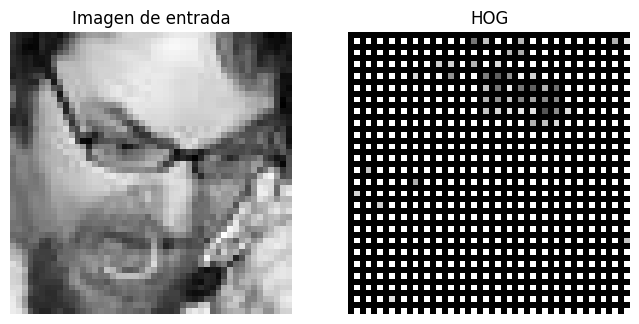

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

# Cargar una imagen de ejemplo
image = Image.open("/content/drive/MyDrive/Data/archive/NormalizedData/angry/PrivateTest_10131363.jpg")

# Calcular el descriptor HOG
hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, multichannel=False)

# Visualizar la imagen de entrada y la imagen HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Imagen de entrada')

# Ajustar la imagen HOG para mejorar su visualización
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')

plt.show()

(512, 512, 3)


<ipython-input-11-1a4d2cb941d1>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)


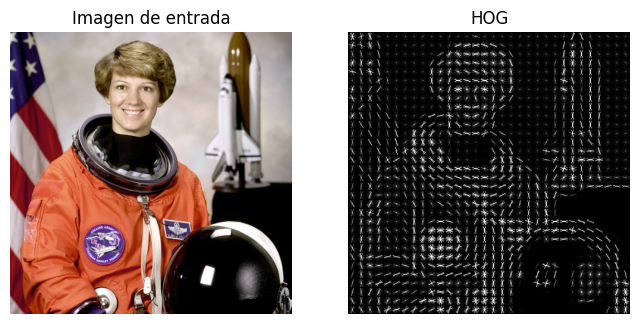

In [ ]:

from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

# Cargar una imagen de ejemplo
image = data.astronaut()
print(image.shape)

# Calcular el descriptor HOG
hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

# Visualizar la imagen de entrada y la imagen HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Imagen de entrada')

# Ajustar la imagen HOG para mejorar su visualización
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')

plt.show()



# Local Binary Patterns
El proceso de Local Binary Patterns (LBP) es una técnica de procesamiento de imágenes que se utiliza para la extracción de características locales de una imagen. El método se basa en la comparación de los valores de intensidad de los píxeles vecinos a un píxel central en una ventana determinada. El resultado de esta comparación se utiliza para crear un número binario que representa el patrón de la vecindad de píxeles.

El proceso se puede describir en los siguientes pasos:

Dividir la imagen en celdas de un tamaño determinado.
Para cada píxel en una celda, comparar su valor de intensidad con los valores de intensidad de los píxeles vecinos. Si el valor del píxel vecino es mayor o igual al valor del píxel central, se asigna un valor binario de 1 a la posición correspondiente en un número binario. De lo contrario, se asigna un valor binario de 0 a esa posición.
Concatenar todos los números binarios generados para todos los píxeles en una celda para formar un vector de características LBP para esa celda.
Realizar un histograma de los vectores de características LBP para todas las celdas de la imagen para obtener una representación compacta de la información de la imagen.
El método LBP es particularmente bueno para la extracción de características en imágenes de baja resolución porque es invariante a la escala y a la rotación, y puede capturar patrones locales de texturas y estructuras en la imagen. Además, el uso de histogramas permite una representación compacta de la información de la imagen, lo que es especialmente útil en imágenes de baja resolución donde la cantidad de información disponible es limitada.

El método LBP también se utiliza comúnmente en combinación con el algoritmo SVM (Support Vector Machine) para la clasificación de imágenes. SVM es un algoritmo de aprendizaje supervisado que utiliza vectores de características para construir un modelo de clasificación. El uso de vectores de características LBP como entrada para un modelo SVM ha demostrado ser efectivo para la clasificación de imágenes en diversas aplicaciones, incluyendo el reconocimiento facial y la clasificación de emociones en imágenes.

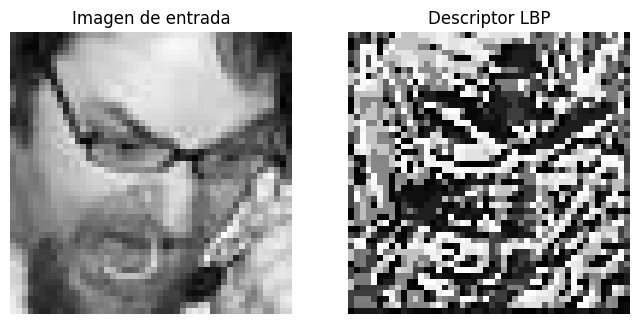

[[0.25098039 0.43921569 0.18823529 ... 0.37647059 0.95294118 0.        ]
 [0.         0.23529412 0.24313725 ... 0.69019608 0.98431373 0.26666667]
 [0.01568627 0.23529412 0.99607843 ... 1.         0.75686275 0.1254902 ]
 ...
 [0.25098039 0.48627451 0.48627451 ... 0.51372549 0.00392157 0.        ]
 [0.25098039 0.47058824 0.47058824 ... 0.52941176 0.02745098 0.04705882]
 [0.01568627 0.09411765 0.09411765 ... 0.02745098 0.02745098 0.04705882]]


In [ ]:
from skimage import feature, io, color

# Cargar imagen
img = io.imread('/content/drive/MyDrive/Data/archive/NormalizedData/angry/PrivateTest_10131363.jpg', as_gray=True)

# Cambiar tamaño de la imagen a 48x48
img = np.array(img)
img = img[0:48, 0:48]

# Calcular el descriptor LBP
lbp = feature.local_binary_pattern(img, 8, 1, method='default')

# Normalizar el resultado del descriptor LBP para que esté en el rango [0, 1]
lbp = (lbp - lbp.min()) / (lbp.max() - lbp.min())

# Visualizar la imagen original y el descriptor LBP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Imagen de entrada')

ax2.axis('off')
ax2.imshow(lbp, cmap=plt.cm.gray)
ax2.set_title('Descriptor LBP')

plt.show()

print(lbp)